In [16]:
%matplotlib inline

#  Centrality


G: Centrality values  Degree centrality: 
[0.2777777777777778, 0.38888888888888884, 0.2222222222222222, 0.2777777777777778, 0.2222222222222222, 0.2777777777777778, 0.38888888888888884, 0.38888888888888884, 0.4444444444444444, 0.2222222222222222, 0.4444444444444444, 0.2777777777777778, 0.2777777777777778, 0.3333333333333333, 0.3333333333333333, 0.38888888888888884, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666]


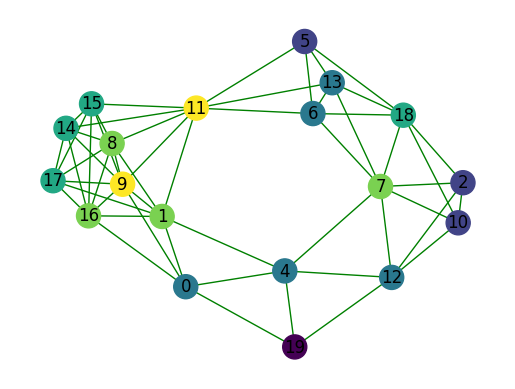

G2: Centrality values  Degree centrality: 
[1.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.5, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333]


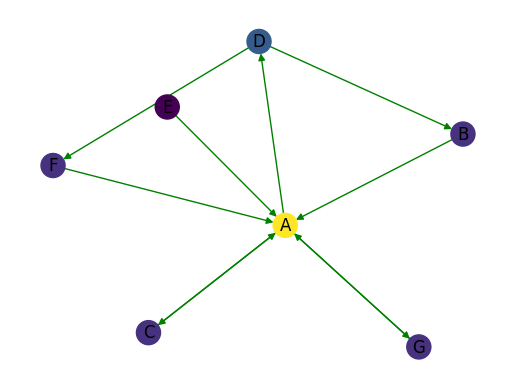

In [17]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Graph random
# Example 1: undirected graph G
G = nx.random_geometric_graph(20, radius=0.4, seed=3)
# Example 2: Directed graph G2
G2 = nx.DiGraph()  #empty
[G2.add_node(k) for k in ["A", "B", "C", "D", "E", "F", "G"]]
G2.add_edges_from([('G','A'), ('A','G'),('B','A'),
                  ('C','A'),('A','C'),('A','D'),
                  ('E','A'),('F','A'),('D','B'),
                  ('D','F')])

# optional: remove low-degree nodes (ex. cele cu grad <3)
low_degree = [n for n, d in G.degree() if d < 3]
G.remove_nodes_from(low_degree)

# How central a node is to the group
# All Centrality algorithms
# https://networkx.org/documentation/stable/reference/algorithms/centrality.html
# Majoritar, rrezultatele din Centrality sunt normalizate prin impartire la cel mai mare valoare (grad) posibila

# Degree centrality=number of connections a node has.
# go “in” the node and edges that go “out” of the node.
# normalised by dividing by the maximum possible degree in a simple graph n-1, n=number nodes
centrality=nx.degree_centrality(G)

colors = list(centrality.values())
print("G: Centrality values  Degree centrality: ")
print(colors)
nx.draw_networkx(
    G,
    nx.spring_layout(G),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()

# Example 2:
centrality=nx.degree_centrality(G2)
colors = list(centrality.values())
print("G2: Centrality values  Degree centrality: ")
print(colors)


nx.draw_networkx(
    G2, nx.spring_layout(G2),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()

G: Centrality values  Betweenness centrality: 
[0.0855512615028186, 0.14189239569862408, 0.005714002772826302, 0.16419132418267365, 0.02750979476758024, 0.06181927613588514, 0.152808589270527, 0.01850655592005073, 0.05711391805682463, 0.005714002772826302, 0.26962300963166014, 0.07270322270322271, 0.06181927613588514, 0.012836409073433296, 0.012836409073433296, 0.03061143649378943, 0.005670146846617435, 0.06930792519027813, 0.018280847692612394]


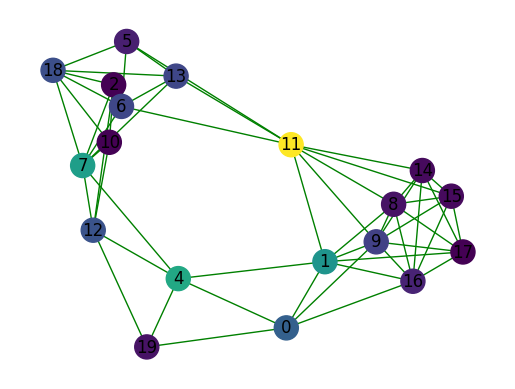

In [18]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
# compute centrality: betweenness centrality

centrality = nx.betweenness_centrality(G)

# Betweenness centrality of a node v = sum of fraction of all-pairs shortest paths that pass through v
# c_B(v) =sum (sum(s, t|v) / sum(s, t)) where s,t from V set
# where V=set of nodes; sum(s,t)=number shortest (s, t)-paths
# sum(s,t|v)=number of paths passing through some node v other than s, t
# If s=t, sum(s,t)=1, if v in {s,t} sum(s,t|v) = 0

colors = list(centrality.values())
print("G: Centrality values  Betweenness centrality: ")
print(colors)
nx.draw_networkx(
    G,
    nx.spring_layout(G),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()


G2: Centrality values  Betweenness centrality: 
[0.7666666666666666, 0.05, 0.0, 0.3333333333333333, 0.0, 0.05, 0.0]


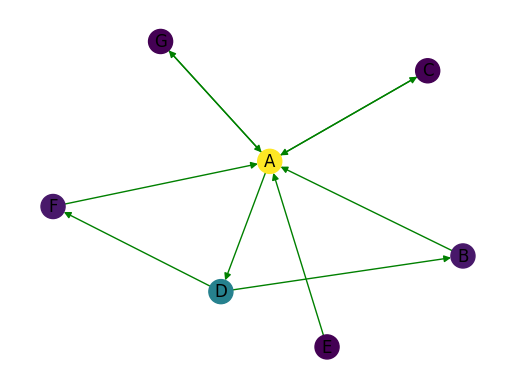

In [19]:
# Example 2:
centrality = nx.betweenness_centrality(G2)

colors = list(centrality.values())
print("G2: Centrality values  Betweenness centrality: ")
print(colors)

nx.draw_networkx(
    G2, nx.spring_layout(G2),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()

G: Centrality values Clossenes centrality: 
[0.4864864864864865, 0.5625, 0.3829787234042553, 0.5294117647058824, 0.46153846153846156, 0.5142857142857142, 0.5142857142857142, 0.4864864864864865, 0.5142857142857142, 0.3829787234042553, 0.5625, 0.43902439024390244, 0.5142857142857142, 0.45, 0.45, 0.45, 0.42857142857142855, 0.43902439024390244, 0.4186046511627907]


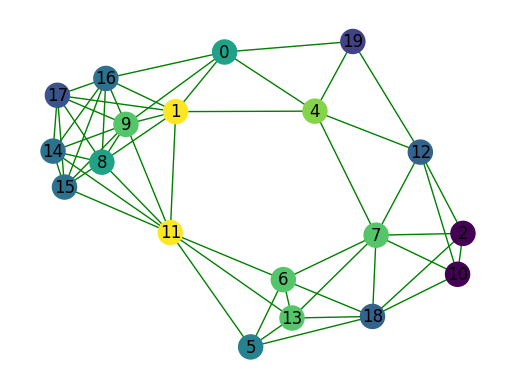

G2: Centrality values  Clossenes centrality: 
[0.8571428571428571, 0.4, 0.5, 0.5454545454545454, 0.0, 0.4, 0.5]


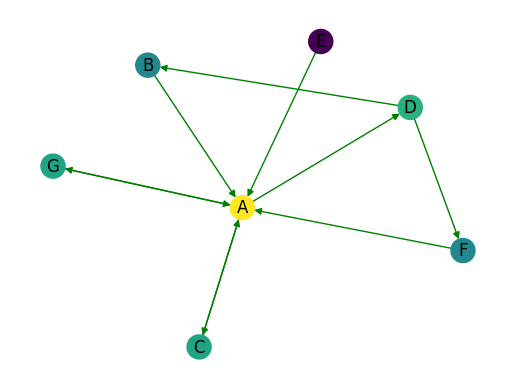

In [20]:
# compute centrality with closeness centrality
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality

centrality = nx.closeness_centrality(G)

# higher values of closeness indicate higher centrality.
# is the reciprocal of the sum of the shortest path distances from `u` to all `n-1` other nodes.
# Since the sum of distances depends on the number of nodes in the graph,
# closeness is normalized by the sum of minimum possible distances `n-1`.
# C(u) = (n-1)/sum (d(v, u))  where v=1..n-1
# d(v, u) shortest-path distance between v and u, n= no. nodes

colors = list(centrality.values())
print("G: Centrality values Clossenes centrality: ")
print(colors)

nx.draw_networkx(
    G,  nx.spring_layout(G),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()

# Example 2
centrality = nx.closeness_centrality(G2)

colors = list(centrality.values())
print("G2: Centrality values  Clossenes centrality: ")
print(colors)

nx.draw_networkx(
    G2, nx.spring_layout(G2),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()


Centrality values Page Rank:  [0.04692776178105851, 0.06135762720654658, 0.04131566120587492, 0.049035820576576, 0.03940834367942508, 0.0483296742967243, 0.06808360877426171, 0.05983830813504181, 0.06829548187719979, 0.04131566120587492, 0.0703530245603489, 0.05094832865377589, 0.048329674296724294, 0.051863554694947404, 0.051863554694947404, 0.060309934137124065, 0.051841002439512486, 0.058875493398110296, 0.03170748438592518]


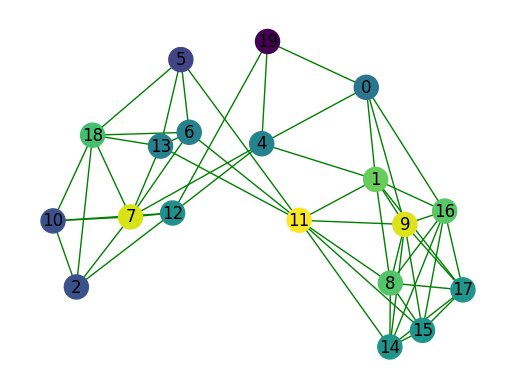

Page rank value: 
{'A': 0.4080745143467559, 'B': 0.07967426232810562, 'C': 0.13704946318948705, 'D': 0.13704946318948705, 'E': 0.021428571428571432, 'F': 0.07967426232810562, 'G': 0.13704946318948705}


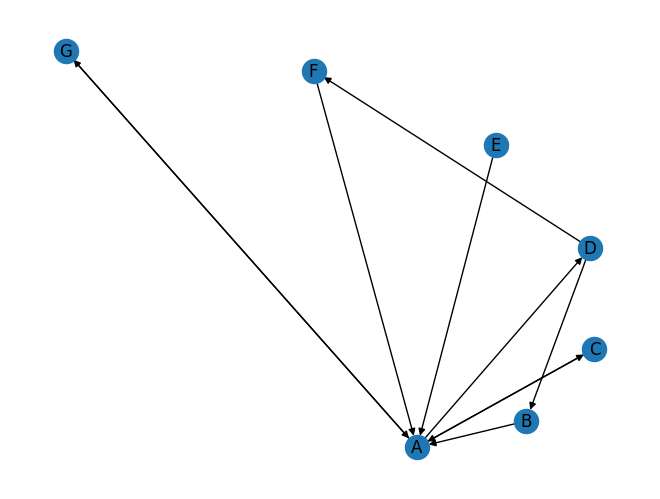

In [21]:
# compute centrality with Page Rank
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

centrality = nx.pagerank(G, alpha=0.9)

# https://networkx.guide/algorithms/centrality-algorithms/pagerank
# pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

# Pseudocode
# n = number of nodes in graph
# INIT LIST A
# INIT LIST PR
# FOR i = 0 to n-1
#     A[i] = 1/n-1
# ENDFOR
# d = 0.85 (value between 0 and 1)

# FOR i = 0 to n-1
#     PR[i] = 1-d
#     FOR EACH page Q that connects to PR[i]
#         On = number of outgoing edges of Q
#         PR[i] = PR[i] + d * A[Q]/On
#         FOR i = 0 to n-1
#             A[i] = PR[i]
#         ENDFOR
#     ENDFOR
# ENDFOR

colors = list(centrality.values())

print("Centrality values Page Rank: ",colors)
nx.draw_networkx(
    G, nx.spring_layout(G),
    node_size=300,
    node_color=colors,
    edge_color="g",
    with_labels=True,
)
plt.axis("off")
plt.show()

# Example 2

print("Page rank value: ")
print(nx.pagerank(G2))

pos = nx.spiral_layout(G2)
nx.draw(G2, pos, with_labels = True)
plt.show()
